In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

import datetime as dt
%matplotlib inline

In [110]:
mydata = pd.read_excel('cardtransactions.xlsx')

In [111]:
dtypes = {
    "Recnum" : 'str',
    "Cardnum" : 'str',
    "Merch zip" : 'str'
}

mydata = mydata.astype(dtypes)
mydata.dtypes

Recnum                       object
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [112]:
nrecords = len(mydata)
nrecords

96753

In [113]:
colnames = ['recnum','cardnum','date','merchnum','merchdesc','merchstate','merchzip','transtype','amount','fraud']
mydata.columns = colnames

In [114]:
mydata

recnum     cardnum       date       merchnum                merchdesc  \
0          1  5142190439 2010-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1          2  5142183973 2010-01-01    61003026333  SERVICE MERCHANDISE #81   
2          3  5142131721 2010-01-01  4503082993600        OFFICE DEPOT #191   
3          4  5142148452 2010-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4          5  5142190439 2010-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
...      ...         ...        ...            ...                      ...   
96748  96749  5142276053 2010-12-31  3500000006160   BEST BUY      00001610   
96749  96750  5142225701 2010-12-31  8090710030950   MARKUS OFFICE SUPPLIES   
96750  96751  5142226486 2010-12-31  4503057341100            TECH PAC, INC   
96751  96752  5142244619 2010-12-31  8834000695412                  BUY.COM   
96752  96753  5142243247 2010-12-31  9108347680006    STAPLES NATIONAL #471   

      merchstate merchzip transtype   amount  fraud  
0             TN  38118.0         P     3.62      0  
1             MA   1803.0         P    31.42      0  
2             MD  20706.0         P   178.49      0  
3             TN  38118.0         P     3.62      0  
4             TN  38118.0         P     3.62      0  
...          ...      ...       ...      ...    ...  
96748         KY  41042.0         P    84.79      0  
96749         OH  45248.0         P   118.75      0  
96750         OH  45150.0         P   363.56      0  
96751         CA  92656.0         P  2202.03      0  
96752         NJ   7606.0         P   554.64      0  

[96753 rows x 10 columns]

## Filter out exclusions

In [115]:
mydata = mydata[(mydata.amount < 3000000) & (mydata.transtype == 'P') ]

In [116]:
len(mydata)

96397

In [172]:
mydata.merchstate.unique()

array(['TN', 'MA', 'MD', 'OH', 'GA', 'IL', 'TX', 'WA', 'WI', 'NJ', 'FL',
       'NY', 'CA', 'MS', 'VA', 'MO', 'PA', 'NC', 'WV', 'CT', 'KS', 'OR',
       'SC', 'MI', 'MN', 'KY', 'ME', 'CO', 'DC', 'AK', 'IA', 'NH', 'MT',
       'OK', nan, 'NV', 'RI', 'NE', 'AZ', 'NM', 'UT', 'ID', 'SD', 'AL',
       'DE', 'BC', 'LA', 'QC', 'IN', 'ON', 'VT', 'ND', 'AR', 'MB', 'HI',
       'WY', 'PQ', 'NS', 'AB', 'US'], dtype=object)

## Dealing with Missing Values

In [118]:
mydata.merchzip = mydata.merchzip.replace('nan',np.nan)

In [119]:
list(zip(mydata.columns,[sum(mydata[c].isnull()) for c in mydata.columns]))

[('recnum', 0),
 ('cardnum', 0),
 ('date', 0),
 ('merchnum', 3198),
 ('merchdesc', 0),
 ('merchstate', 1020),
 ('merchzip', 4300),
 ('transtype', 0),
 ('amount', 0),
 ('fraud', 0)]

### Filling Merchant Number

In [201]:
def get_most_common_merchnum(x):
    t = x['merchnum'].value_counts().reset_index()
    if len(t) != 0:
        cm = t[t.merchnum == np.max(t.merchnum)]['index'][0]
        return cm
    else:
        return np.nan

In [202]:
replacement1 = mydata[mydata.merchnum.isnull()].merchdesc.map(mydata.groupby(['merchdesc']).apply(get_most_common_merchnum))
mydata.loc[mydata.merchnum.isnull(),'merchnum'] = replacement1.values

In [203]:
replacement2 = mydata[mydata.merchnum.isnull()].merchzip.map(mydata.groupby(['merchzip']).apply(get_most_common_merchnum))
mydata.loc[mydata.merchnum.isnull(),'merchnum'] = replacement2.values

In [204]:
replacement3 = mydata[mydata.merchnum.isnull()].merchstate.map(mydata.groupby(['merchstate']).apply(get_most_common_merchnum))
mydata.loc[mydata.merchnum.isnull(),'merchnum'] = replacement3.values

In [205]:
list(zip(mydata.columns,[sum(mydata[c].isnull()) for c in mydata.columns]))

[('recnum', 0),
 ('cardnum', 0),
 ('date', 0),
 ('merchnum', 17),
 ('merchdesc', 0),
 ('merchstate', 0),
 ('merchzip', 278),
 ('transtype', 0),
 ('amount', 0),
 ('fraud', 0)]

### Filling Merchant State

In [193]:
def get_most_common_merchstate(x):
    t = x['merchstate'].value_counts().reset_index()
    if len(t) != 0:
        cm = t[t.merchstate == np.max(t.merchstate)]['index'][0]
        return cm
    else:
        return np.nan

In [194]:
replacement1 = mydata[mydata.merchstate.isnull()].merchdesc.map(mydata.groupby(['merchdesc']).apply(get_most_common_merchstate))
mydata.loc[mydata.merchstate.isnull(),'merchstate'] = replacement1.values

In [195]:
replacement2 = mydata[mydata.merchstate.isnull()].merchnum.map(mydata.groupby(['merchnum']).apply(get_most_common_merchstate))
mydata.loc[mydata.merchstate.isnull(),'merchstate'] = replacement2.values

In [196]:
replacement3 = mydata[mydata.merchstate.isnull()].merchzip.map(mydata.groupby(['merchzip']).apply(get_most_common_merchstate))
mydata.loc[mydata.merchstate.isnull(),'merchstate'] = replacement3.values

In [197]:
list(zip(mydata.columns,[sum(mydata[c].isnull()) for c in mydata.columns]))

[('recnum', 0),
 ('cardnum', 0),
 ('date', 0),
 ('merchnum', 232),
 ('merchdesc', 0),
 ('merchstate', 304),
 ('merchzip', 278),
 ('transtype', 0),
 ('amount', 0),
 ('fraud', 0)]

### Filling Merchant ZIP

In [206]:
def get_most_common_merchzip(x):
    t = x['merchzip'].value_counts().reset_index()
    if len(t) != 0:
        cm = t[t.merchzip == np.max(t.merchzip)]['index'][0]
        return cm
    else:
        return np.nan

In [207]:
replacement1 = mydata[mydata.merchzip.isnull()].merchdesc.map(mydata.groupby(['merchdesc']).apply(get_most_common_merchzip))
mydata.loc[mydata.merchzip.isnull(),'merchzip'] = replacement1.values

In [208]:
replacement2 = mydata[mydata.merchzip.isnull()].merchnum.map(mydata.groupby(['merchnum']).apply(get_most_common_merchzip))
mydata.loc[mydata.merchzip.isnull(),'merchzip'] = replacement2.values

In [209]:
replacement3 = mydata[mydata.merchzip.isnull()].merchstate.map(mydata.groupby(['merchstate']).apply(get_most_common_merchzip))
mydata.loc[mydata.merchzip.isnull(),'merchzip'] = replacement3.values

In [210]:
list(zip(mydata.columns,[sum(mydata[c].isnull()) for c in mydata.columns]))

[('recnum', 0),
 ('cardnum', 0),
 ('date', 0),
 ('merchnum', 17),
 ('merchdesc', 0),
 ('merchstate', 0),
 ('merchzip', 40),
 ('transtype', 0),
 ('amount', 0),
 ('fraud', 0)]

### Final Missing Values

In [198]:
# Replace missing state with TN and RE-RUN zip and num
mydata.merchstate = mydata.merchstate.fillna('TN') ## --- RE-RUN Above

In [212]:
list(zip(mydata.columns,[sum(mydata[c].isnull()) for c in mydata.columns]))

[('recnum', 0),
 ('cardnum', 0),
 ('date', 0),
 ('merchnum', 17),
 ('merchdesc', 0),
 ('merchstate', 0),
 ('merchzip', 40),
 ('transtype', 0),
 ('amount', 0),
 ('fraud', 0)]

In [213]:
mydata = mydata.dropna()

In [216]:
#FINAL
list(zip(mydata.columns,[sum(mydata[c].isnull()) for c in mydata.columns]))

[('recnum', 0),
 ('cardnum', 0),
 ('date', 0),
 ('merchnum', 0),
 ('merchdesc', 0),
 ('merchstate', 0),
 ('merchzip', 0),
 ('transtype', 0),
 ('amount', 0),
 ('fraud', 0)]

In [217]:
len(mydata)

96357

### Export cleaned csv

In [218]:
#mydata.to_csv('final_card_trans.csv')

## Creating Expert Variables

In [285]:
mydata = pd.read_csv('final_card_trans.csv')
mydata = mydata.iloc[:,1:]

In [286]:
dtypes = {
    "cardnum" : 'str',
    "merchzip" : 'str'
}

mydata = mydata.astype(dtypes)
mydata.date = pd.to_datetime(mydata.date, format = '%Y-%m-%d')
mydata.dtypes

recnum                 int64
cardnum               object
date          datetime64[ns]
merchnum              object
merchdesc             object
merchstate            object
merchzip              object
transtype             object
amount               float64
fraud                  int64
dtype: object

In [287]:
# Create additional entities

# card at this merchant
mydata['card_merch'] = mydata['cardnum'] + '_' + mydata['merchnum']
# card at this zip
mydata['card_zip'] = mydata['cardnum'] + '_' + mydata['merchzip']
# card at this state
mydata['card_state'] = mydata['cardnum'] + '_' + mydata['merchstate']
# merch at this zip
mydata['merch_zip'] = mydata['merchnum'] + '_' + mydata['merchzip']
# merch at this state
mydata['merch_state'] = mydata['merchnum'] + '_' + mydata['merchstate']


In [288]:
mydata

recnum     cardnum       date       merchnum                merchdesc  \
0           1  5142190439 2010-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1           2  5142183973 2010-01-01    61003026333  SERVICE MERCHANDISE #81   
2           3  5142131721 2010-01-01  4503082993600        OFFICE DEPOT #191   
3           4  5142148452 2010-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4           5  5142190439 2010-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
...       ...         ...        ...            ...                      ...   
96352   96749  5142276053 2010-12-31  3500000006160   BEST BUY      00001610   
96353   96750  5142225701 2010-12-31  8090710030950   MARKUS OFFICE SUPPLIES   
96354   96751  5142226486 2010-12-31  4503057341100            TECH PAC, INC   
96355   96752  5142244619 2010-12-31  8834000695412                  BUY.COM   
96356   96753  5142243247 2010-12-31  9108347680006    STAPLES NATIONAL #471   

      merchstate merchzip transtype   amount  fraud                card_merch  \
0             TN  38118.0         P     3.62      0  5142190439_5509006296254   
1             MA   1803.0         P    31.42      0    5142183973_61003026333   
2             MD  20706.0         P   178.49      0  5142131721_4503082993600   
3             TN  38118.0         P     3.62      0  5142148452_5509006296254   
4             TN  38118.0         P     3.62      0  5142190439_5509006296254   
...          ...      ...       ...      ...    ...                       ...   
96352         KY  41042.0         P    84.79      0  5142276053_3500000006160   
96353         OH  45248.0         P   118.75      0  5142225701_8090710030950   
96354         OH  45150.0         P   363.56      0  5142226486_4503057341100   
96355         CA  92656.0         P  2202.03      0  5142244619_8834000695412   
96356         NJ   7606.0         P   554.64      0  5142243247_9108347680006   

                 card_zip     card_state              merch_zip  \
0      5142190439_38118.0  5142190439_TN  5509006296254_38118.0   
1       5142183973_1803.0  5142183973_MA     61003026333_1803.0   
2      5142131721_20706.0  5142131721_MD  4503082993600_20706.0   
3      5142148452_38118.0  5142148452_TN  5509006296254_38118.0   
4      5142190439_38118.0  5142190439_TN  5509006296254_38118.0   
...                   ...            ...                    ...   
96352  5142276053_41042.0  5142276053_KY  3500000006160_41042.0   
96353  5142225701_45248.0  5142225701_OH  8090710030950_45248.0   
96354  5142226486_45150.0  5142226486_OH  4503057341100_45150.0   
96355  5142244619_92656.0  5142244619_CA  8834000695412_92656.0   
96356   5142243247_7606.0  5142243247_NJ   9108347680006_7606.0   

            merch_state  
0      5509006296254_TN  
1        61003026333_MA  
2      4503082993600_MD  
3      5509006296254_TN  
4      5509006296254_TN  
...                 ...  
96352  3500000006160_KY  
96353  8090710030950_OH  
96354  4503057341100_OH  
96355  8834000695412_CA  
96356  9108347680006_NJ  

[96357 rows x 15 columns]

In [348]:
entities = ['cardnum','merchnum','card_merch','card_zip','card_state','merch_zip','merch_state']
final_df = mydata[['recnum','date','amount']]

In [349]:
print("---------------------Generating Variables---------------------")
start1 = timeit.default_timer()
for entity in entities:
    start2 = timeit.default_timer()
    # initialize 2 tables to join and 1 table to form final result
    check_df = mydata[['recnum','date',entity]]
    check_df.rename(columns={'recnum': 'check_recnum','date':'check_date' },inplace=True)
    df1 = mydata[['recnum','date',entity,'amount']]
    # join to get all transactions for each transaction record
    temp = pd.merge(check_df,df1, on = entity)
    # time alignment and fetch the most recent transaction detail to get days since last transaction
    temp1 = temp[temp.check_recnum > temp.recnum][['check_recnum','check_date','date']].groupby('check_recnum')[['check_date','date']].last()
    mapper = (temp1.check_date - temp1.date).dt.days 
    final_df[entity + '_days_since'] = final_df.recnum.map(mapper)
    final_df[entity + '_days_since'].fillna((final_df.date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print(entity + ' days since ---> Done')
    # different past number of days
    for time in [0,1,3,7,14,30]:
        temp2 = temp[(temp.date >= (temp.check_date - dt.timedelta(time)))&(temp.check_recnum>=temp.recnum)]
        # FREQUENCY 
        col_name = entity + '_count_' + str(time)
        final_df[col_name] = final_df.recnum.map(temp2.groupby('check_recnum')[entity].count())
        # AMOUNT
        final_df[entity + '_avg_' + str(time)] = final_df.recnum.map(temp2.groupby('check_recnum')['amount'].mean())
        final_df[entity + '_max_' + str(time)] = final_df.recnum.map(temp2.groupby('check_recnum')['amount'].max())
        final_df[entity + '_med_' + str(time)] = final_df.recnum.map(temp2.groupby('check_recnum')['amount'].median())
        final_df[entity + '_sum_' + str(time)] = final_df.recnum.map(temp2.groupby('check_recnum')['amount'].sum())
        final_df[entity + '_actual/avg_' + str(time)] = final_df['amount'] / final_df[entity + '_avg_' + str(time)]
        final_df[entity + '_actual/max_' + str(time)] = final_df['amount'] / final_df[entity + '_max_' + str(time)]
        final_df[entity + '_actual/med_' + str(time)] = final_df['amount'] / final_df[entity + '_med_' + str(time)]
        final_df[entity + '_actual/sum_' + str(time)] = final_df['amount'] / final_df[entity + '_sum_' + str(time)]
        # VELOCITY CHANGE FOR FREQUENCY AND AMOUNT 
        if (time in [7,14,30]):
            # avg number daily basis
            final_df[entity + '_avgdailycount_' + str(time)] = final_df.recnum.map(temp2.groupby(['check_recnum','date'])[entity].\
            count().reset_index().groupby('check_recnum')[entity].mean())
            # avg amount daily basis
            final_df[entity + '_avgdailyamount_' + str(time)] = final_df.recnum.map(temp2.groupby(['check_recnum','date'])['amount'].\
            sum().reset_index().groupby('check_recnum')['amount'].mean())
        print(entity + ' freq/amount/velocity variables over past ' + str(time) + ' ---> Done')
    end2 = timeit.default_timer() - start2
    print("Processing time for " + entity + ": " + str(format(end2/60,'.2f')) +" mins")
    print("---------------------")


end1 = timeit.default_timer() - start1
print("")
print("Final processing time: " + str(format(end1/60,'.2f')) +" mins ---------> DONE")

---------------------Generating Variables---------------------
cardnum days since ---> Done
cardnum freq/amount/velocity variables over past 0 ---> Done
cardnum freq/amount/velocity variables over past 1 ---> Done
cardnum freq/amount/velocity variables over past 3 ---> Done
cardnum freq/amount/velocity variables over past 7 ---> Done
cardnum freq/amount/velocity variables over past 14 ---> Done
cardnum freq/amount/velocity variables over past 30 ---> Done
Processing time for cardnum: 0.67 mins
---------------------
merchnum days since ---> Done
merchnum freq/amount/velocity variables over past 0 ---> Done
merchnum freq/amount/velocity variables over past 1 ---> Done
merchnum freq/amount/velocity variables over past 3 ---> Done
merchnum freq/amount/velocity variables over past 7 ---> Done
merchnum freq/amount/velocity variables over past 14 ---> Done
merchnum freq/amount/velocity variables over past 30 ---> Done
Processing time for merchnum: 6.49 mins
---------------------
card_merch da

In [350]:
#final_df.to_csv('expert_variables.csv')

In [3]:
df = pd.read_csv('expert_variables.csv')
df = df.iloc[:,1:]
df.date = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [4]:
df.head()

recnum       date  amount  cardnum_days_since  cardnum_count_0  \
0       1 2010-01-01    3.62                 0.0                1   
1       2 2010-01-01   31.42                 0.0                1   
2       3 2010-01-01  178.49                 0.0                1   
3       4 2010-01-01    3.62                 0.0                1   
4       5 2010-01-01    3.62                 0.0                2   

   cardnum_avg_0  cardnum_max_0  cardnum_med_0  cardnum_sum_0  \
0           3.62           3.62           3.62           3.62   
1          31.42          31.42          31.42          31.42   
2         178.49         178.49         178.49         178.49   
3           3.62           3.62           3.62           3.62   
4           3.62           3.62           3.62           7.24   

   cardnum_actual/avg_0  ...  merch_state_avg_30  merch_state_max_30  \
0                   1.0  ...                3.62                3.62   
1                   1.0  ...               31.42               31.42   
2                   1.0  ...              178.49              178.49   
3                   1.0  ...                3.62                3.62   
4                   1.0  ...                3.62                3.62   

   merch_state_med_30  merch_state_sum_30  merch_state_actual/avg_30  \
0                3.62                3.62                        1.0   
1               31.42               31.42                        1.0   
2              178.49              178.49                        1.0   
3                3.62                7.24                        1.0   
4                3.62               10.86                        1.0   

   merch_state_actual/max_30  merch_state_actual/med_30  \
0                        1.0                        1.0   
1                        1.0                        1.0   
2                        1.0                        1.0   
3                        1.0                        1.0   
4                        1.0                        1.0   

   merch_state_actual/sum_30  merch_state_avgdailycount_30  \
0                   1.000000                           1.0   
1                   1.000000                           1.0   
2                   1.000000                           1.0   
3                   0.500000                           2.0   
4                   0.333333                           3.0   

   merch_state_avgdailyamount_30  
0                           3.62  
1                          31.42  
2                         178.49  
3                           7.24  
4                          10.86  

[5 rows x 430 columns]

In [80]:
#pd.DataFrame(df.describe().transpose()).to_csv('variable_stats.csv')


## Risk Tables excluding OOT data

In [3]:
mydata = pd.read_csv('final_card_trans.csv')
mydata = mydata.iloc[:,1:]
dtypes = {
    "recnum" : 'str',
    "cardnum" : 'str',
    "merchzip" : 'str'
}
mydata.date = pd.to_datetime(mydata.date, format = '%Y-%m-%d')
mydata = mydata.astype(dtypes)
mydata.dtypes

recnum                object
cardnum               object
date          datetime64[ns]
merchnum              object
merchdesc             object
merchstate            object
merchzip              object
transtype             object
amount               float64
fraud                  int64
dtype: object

In [4]:
mydata['month'] = mydata.date.dt.month.astype('str')
mydata['weekday'] = [x.strftime('%A') for x in mydata.date]

In [70]:
mydata_oot = mydata[mydata.month.isin([11,12])]
mydata_train = mydata[~mydata.month.isin([11,12])]

In [81]:
# Smoothing Bayesian Probability to replace month and state - Target Encoding using only train
c=4 
n_mid = 20 
y_avg = mydata_train['fraud'].mean()
catvar = 'weekday'
y_avg_catvar = mydata_train.groupby(catvar)['fraud'].mean()
n_samples_catvar = mydata_train.groupby(catvar).size()
y_smooth_catvar = y_avg + ((y_avg_catvar - y_avg)/(1+np.exp(-(n_samples_catvar-n_mid)/c)))
# map to whole dataset
mydata[catvar + '_riskenc'] = mydata[catvar].map(y_smooth_catvar)

In [88]:
t = y_smooth_catvar.reset_index()
t.columns = ['weekday','fraud_perc']

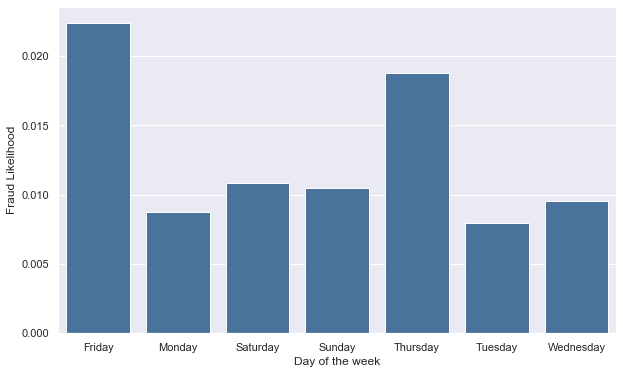

In [96]:


sns.set(style='darkgrid')

plt.rcParams["figure.figsize"] = [10,6]
sns.set(font_scale=1)
sns.barplot(x = 'weekday',y='fraud_perc',data =t , color = "#3c73a8") 
plt.ylabel('Fraud Likelihood', fontsize=12)
plt.xlabel('Day of the week', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()


In [99]:
catvar = 'merchstate'
y_avg_catvar = mydata_train.groupby(catvar)['fraud'].mean()
n_samples_catvar = mydata_train.groupby(catvar).size()
y_smooth_catvar = y_avg + ((y_avg_catvar - y_avg)/(1+np.exp(-(n_samples_catvar-n_mid)/c)))
# map to whole dataset
mydata[catvar + '_riskenc'] = mydata[catvar].map(y_smooth_catvar)

In [101]:
t = y_smooth_catvar.reset_index()
t.columns = ['state','fraud_perc']

In [105]:
t.sort_values('fraud_perc',ascending=False)[:15]

state  fraud_perc
15    IN    0.079245
38    OR    0.047020
50    WA    0.042121
47    UT    0.038339
34    NY    0.021811
35    OH    0.021718
32    NM    0.017391
39    PA    0.017340
7     DC    0.015274
20    MD    0.015171
4     CA    0.013349
43    SD    0.012048
48    VA    0.011663
45    TX    0.011082
46    US    0.010896

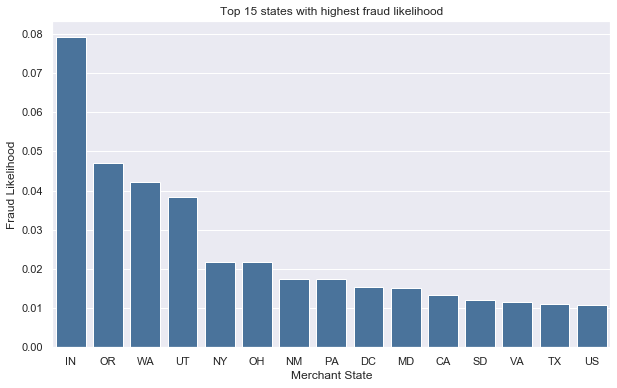

In [107]:


sns.set(style='darkgrid')

plt.rcParams["figure.figsize"] = [10,6]
sns.set(font_scale=1)
sns.barplot(x = 'state',y='fraud_perc',data = t.sort_values('fraud_perc',ascending=False)[:15] , color = "#3c73a8") 
plt.ylabel('Fraud Likelihood', fontsize=12)
plt.xlabel('Merchant State', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title('Top 15 states with highest fraud likelihood')
plt.show()
